# Fashion MNIST Classification
using Keras

In [ ]:
# import modules
from keras.datasets import fashion_mnist
from keras.layers import Dense, Conv2D, Reshape, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Data Load
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

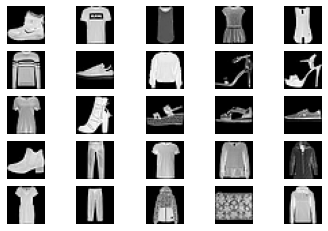

In [ ]:
# Data Visualization
fig, ax = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[5*i + j], cmap='gray')
        ax[i][j].axis('off')
plt.show()

In [ ]:
# Data Preprocessing

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train.reshape((-1, 28, 28, 1))
x_test.reshape((-1, 28, 28, 1))

print(x_train[20][14])
print(x_train.shape)

[0.         0.         0.         0.         0.         0.
 0.         0.00784314 0.         0.3882353  0.85490197 0.7921569
 0.827451   0.8039216  0.8627451  0.8039216  0.84313726 0.8039216
 0.8980392  0.59607846 0.         0.         0.         0.
 0.         0.         0.         0.        ]
(60000, 28, 28)


In [ ]:
# Create Model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_12 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_10 (Bat  (None, 14, 14, 64)      

In [ ]:
# Model Compile and Training

es_call = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

model.compile(optimizer=Adam(learning_rate=2.5e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, batch_size=128, epochs=80, validation_split=0.2, callbacks=[es_call])

Epoch 1/80
375/375 [==============================] - 4s 9ms/step - loss: 0.1252 - acc: 0.9521 - val_loss: 0.2393 - val_acc: 0.9292
Epoch 2/80
375/375 [==============================] - 3s 9ms/step - loss: 0.1185 - acc: 0.9545 - val_loss: 0.2780 - val_acc: 0.9199
Epoch 3/80
375/375 [==============================] - 4s 10ms/step - loss: 0.1192 - acc: 0.9545 - val_loss: 0.2568 - val_acc: 0.9249
Epoch 4/80
375/375 [==============================] - 3s 9ms/step - loss: 0.1150 - acc: 0.9565 - val_loss: 0.2727 - val_acc: 0.9205
Epoch 5/80
375/375 [==============================] - 3s 9ms/step - loss: 0.1161 - acc: 0.9558 - val_loss: 0.2442 - val_acc: 0.9268
Epoch 6/80
375/375 [==============================] - 3s 9ms/step - loss: 0.1147 - acc: 0.9555 - val_loss: 0.2426 - val_acc: 0.9283
Epoch 6: early stopping


In [ ]:
def Plotting(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'bo', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
    plt.title('Trianing and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    plt.show()

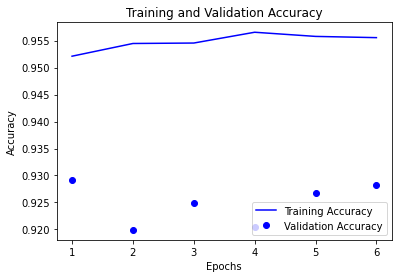

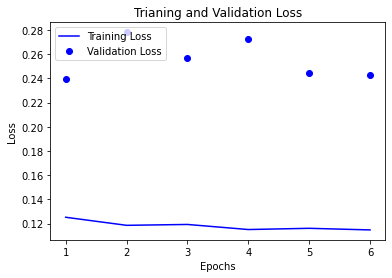

In [ ]:
Plotting(history)

In [ ]:
preds = model.evaluate(x_test, y_test)
print(preds)

313/313 [==============================] - 1s 3ms/step - loss: 0.2887 - acc: 0.9145
[0.28874361515045166, 0.9144999980926514]


In [ ]:
preds_2 = model.evaluate(x_test, y_test)
print(preds_2)

313/313 [==============================] - 1s 3ms/step - loss: 0.2654 - acc: 0.9213
[0.26540112495422363, 0.9212999939918518]
